In [522]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [523]:
heart=pd.read_csv(r'./heart-failure.csv') #importing the data

In [524]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Data Preprocessing

In [525]:
heart['HeartDisease'].value_counts() #counts of people having and not having heart disease.

1    508
0    410
Name: HeartDisease, dtype: int64

### Storing in X and y

In [526]:
X,y=heart.loc[:,:'ST_Slope'],heart.loc[:,'HeartDisease'] #where X=Feature column, y=Target feture column

In the above syntax we are passing all the rows and feature variables starting from age to ST-slope column in X and storing all the rows of heart disease column in y. Also spliting dataset into 2 dataframe namely X,y

In [527]:
X.shape #918 rows of 11 columns stored in X

(918, 11)

In [528]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [529]:
y.shape #918 rows of target feature 'HeartDisease' stored in y 

(918,)

In [530]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

## Encoding of Categorical columns into Numerical Columns

In [531]:
# Import preprocessing
from sklearn import preprocessing
# from preprocessing we are importing label_encoder  
label_encoder = preprocessing.LabelEncoder() #whatever the label, encode it and store in label_encoder
X['Sex'] = label_encoder.fit_transform(X['Sex']) #transform label sex(M,F) and store it back in X dataframe
X['ChestPainType'] = label_encoder.fit_transform(X['ChestPainType'])
X['RestingECG'] = label_encoder.fit_transform(X['RestingECG'])
X['ExerciseAngina'] = label_encoder.fit_transform(X['ExerciseAngina'])
X['ST_Slope'] = label_encoder.fit_transform(X['ST_Slope']) 
X['ChestPainType'].unique() #chestpain taking the unique values

array([1, 2, 0, 3])

In [532]:
heart['ST_Slope'].unique() #st_slope in heart data frame in catrgorical form

array(['Up', 'Flat', 'Down'], dtype=object)

In [533]:
heart['ST_Slope'].head(5) 

0      Up
1    Flat
2      Up
3    Flat
4      Up
Name: ST_Slope, dtype: object

In [534]:
#categorical values transformed into numerical form in preprocessed X dataframe
X['ST_Slope'] 

0      2
1      1
2      2
3      1
4      2
      ..
913    1
914    1
915    1
916    1
917    2
Name: ST_Slope, Length: 918, dtype: int32

## Splitting of train and test data

In [535]:
from sklearn.model_selection import train_test_split #importing train-test-split

In [536]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [537]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (642, 11)
train_set_y shape: (642,)
test_set_x shape: (276, 11)
test_set_y shape: (276,)


train_set_x shape: (642, 11) -> contain 70% of data
train_set_y shape: (642,) -> 70% of data but contain only 1 column
test_set_x shape: (276, 11) -> contain 30% of data
test_set_y shape: (276,) ->30% of data but contain only 1 column

In [538]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
913,45,1,3,110,264,0,1,132,0,1.2,1
7,54,1,1,110,208,0,1,142,0,0.0,2
687,70,1,1,156,245,0,0,143,0,0.0,2
808,35,1,0,126,282,0,0,156,1,0.0,2
765,41,1,2,112,250,0,1,179,0,0.0,2


## Scaling of Data

In [539]:
from sklearn.preprocessing import StandardScaler

In [540]:
sc=StandardScaler().fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [541]:
joblib.dump(sc, 'sc.sav') #save the model

['sc.sav']

# ML Modeling

## 1) Decision Tree 

In [542]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [543]:
prediction=dt.predict(X_test) #predict on test data where X_test is 30% of data
accuracy_dt=accuracy_score(y_test,prediction) * 100 #compare the result with y_test

In [544]:
accuracy_dt #decision tree accuracy score

77.89855072463769

### Feature Importance in Decision Trees

In [545]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.05745488 0.04188637 0.11264795 0.09976935 0.03837699 0.02207787
 0.01700975 0.10962931 0.0242166  0.06296801 0.41396292]


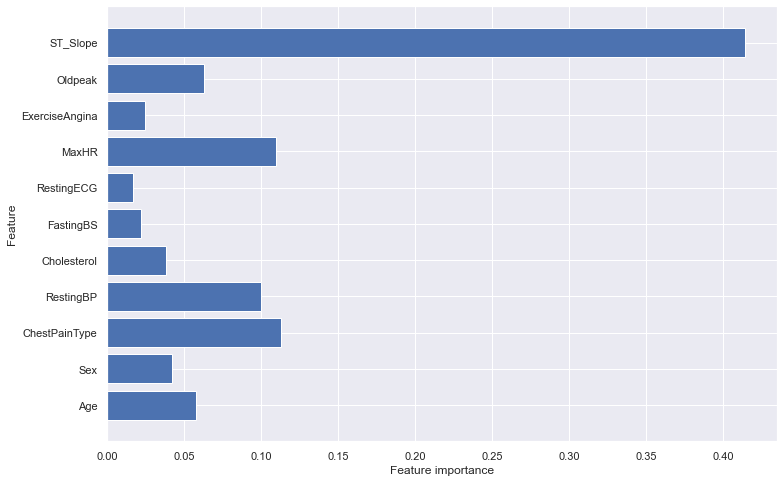

In [546]:
def plot_feature_importances_d_t(model):
    plt.figure(figsize=(12,8))
    n_features = 11
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_d_t(dt)
plt.savefig('feature_importance')

## 2) Ensamble Method:- A) Bagging:- Random Forest 

In [547]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train_std,y_train)

RandomForestClassifier()

In [548]:
prediction=rf.predict(X_test_std)
accuracy_rf=accuracy_score(y_test,prediction) * 100

In [549]:
accuracy_rf

84.42028985507247

## B) Boosting:- XG-BOOST

In [550]:
#!pip install xgboost

In [551]:
import xgboost as xgb
xg=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xg.fit(X_train_std, y_train)
prediction=xg.predict(X_test_std)
accuracy_xg=accuracy_score(y_test,prediction) * 100

In [552]:
accuracy_xg

79.71014492753623

## C) Boosting:- Ada-Boost Classifier

In [553]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
abc.fit(X_train, y_train)

#Predict the response for test dataset
prediction=abc.predict(X_test)
accuracy_abc=accuracy_score(y_test,prediction) * 100

In [554]:
accuracy_abc

82.6086956521739

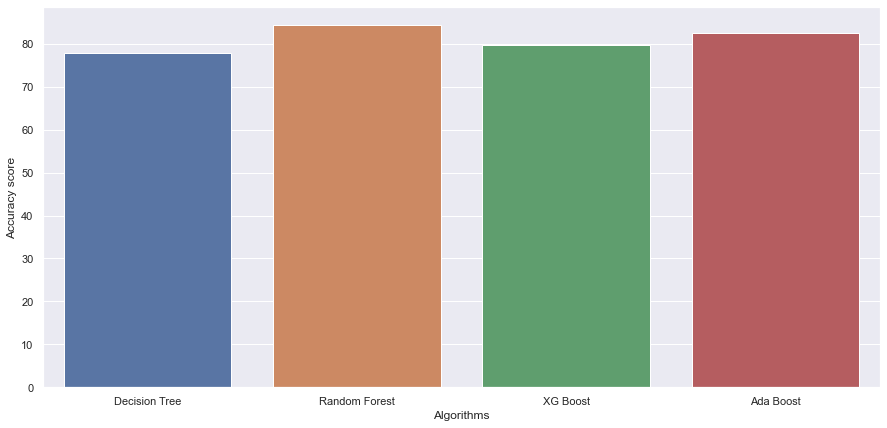

In [555]:
algorithms=['Decision Tree','Random Forest', 'XG Boost', 'Ada Boost']
scores=[accuracy_dt,accuracy_rf, accuracy_xg, accuracy_abc]

sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)
plt.show()

In [556]:
import joblib

In [557]:
joblib.dump(rf, 'models/rf.sav') #save random forest model

['models/rf.sav']

# Bagging Implementation for classification and regression from scratch

In [558]:
class MyBagging():

    def __init__(self, ML_problem, B):
        self.ML_problem = ML_problem
        self.B = B
        self.prediction_rules = []

    def train(self, training_samples, training_labels):
        
        if self.ML_problem == 'classification':
            weak_learner = DecisionTreeClassifier()
        else:
            weak_learner = DecisionTreeRegressor()

        for i in range(self.B):
            #combine datset and labels
            comb_data = np.insert(training_samples,len(training_samples[0]),training_labels,axis =1)
           
            #extract bootstrap sample
            bootstrapped = []
            for i in range(1):
                ident = np.random.choice(np.shape(comb_data)[0], size = (np.shape(comb_data)[0]))
                temp = comb_data[ident,:]
                bootstrapped =  temp

            #split bootstrap sample into dataset and labels 
            curr_bts_sample = bootstrapped[:, :-1]
            curr_bts_lables = bootstrapped[:, -1]
            #fit
            cur_prediction_rule = weak_learner.fit(curr_bts_sample, curr_bts_lables)
            self.prediction_rules.append(cur_prediction_rule)

    def predict(self, test_data):

        test_data = np.array(test_data)
        if test_data.ndim == 1:
                test_data = test_data.reshape(1, -1)

        ensemble_predictions = []

        for prediction_rule in self.prediction_rules:
            prediciton = prediction_rule.predict(test_data)
            ensemble_predictions.append(prediciton)

        if self.ML_problem == 'regression':
            return sum(ensemble_predictions, axis=0)/len(ensemble_predictions)
        else:
            final_predictions = []
            for i in range(len(ensemble_predictions[0])):
                tp = np.array(ensemble_predictions)[:,i].astype(int)
                final_predictions.append(np.bincount(tp).argmax()) 
            return final_predictions

In [559]:
hd = MyBagging('classification',100)

In [560]:
hd.train(X_train_std, y_train)

In [561]:
preds = hd.predict(X_test)


In [562]:
my_accuracy_dt=accuracy_score(y_test,preds) * 100

In [563]:
my_accuracy_dt

49.275362318840585